## 1. Load the data

Create a new notebook. Read the datasets: extract - cash request - data analysis.csv and extract - fees - data analysis -.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importing the Seaborn library for advanced data visualization (as sns)
import seaborn as sns

# Importing the Matplotlib library for basic plotting functionalities (as plt)
import matplotlib.pyplot as plt


In [3]:
#upload the files
df_cash_request= pd.read_csv(r"/Users/turfdiddy/Desktop/Bootcamp_ds:ml/Week 2/Day_3/project-1-ironhack-payments-2-en/project_dataset/extract - cash request - data analyst.csv")
df_fees= pd.read_csv(r"/Users/turfdiddy/Desktop/Bootcamp_ds:ml/Week 2/Day_3/project-1-ironhack-payments-2-en/project_dataset/extract - fees - data analyst - .csv")

Add comments to explain each step as you move forward.

1. Frequency of Service Usage: Understand how often users from each cohort utilize IronHack Payments' cash advance services over time.

-  cash request  -> created at, updated at, sent at - status

2. Incident Rate: Determine the incident rate, explicitly focusing on payment incidents, for each cohort. Identify if there are variations in incident rates among different cohorts.

- fees -> id, type, category, status 

3. Revenue Generated by the Cohort: Calculate the total revenue generated by each cohort over months to assess the financial impact of user behavior.

- cohort

- fees -> total amount, status

4. New Relevant Metric: Propose and calculate a new relevant metric that provides additional insights into user behavior or the performance of IronHack Payments' services.

BONUS.

## 2. Data Quality Analysis + General EDA

a. Use .info(), .isnull(), .duplicated(), .value_counts(), .describe() and .unique() to:
- Identify missing values - decide whether you want to drop them - .dropna() - or fill them - .fillna()

In [4]:
#Check for missing values - sum

missing_values_cash_request = pd.isnull(df_cash_request).sum()
missing_values_fees = pd.isnull(df_fees).sum()

In [5]:
print("Missing Values in Cash request Column:\n", missing_values_cash_request)

Missing Values in Cash request Column:
 id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64


In [6]:
print("Missing Values in Fees Column:\n", missing_values_fees)

Missing Values in Fees Column:
 id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13295
to_date            13295
charge_moment          0
dtype: int64


In [7]:
# Select only the specified columns we are interested in
cash_request_clean = df_cash_request[['id', 'created_at', 'updated_at', 'send_at', 'status']]


# Display the cleaned DataFrame
cash_request_clean

,id,created_at,updated_at,send_at,status
0,5,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,NaN,rejected
1,70,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,NaN,rejected
2,7,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,NaN,rejected
3,10,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,NaN,rejected
4,1594,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,NaN,rejected
...,...,...,...,...,...
23965,20616,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,2020-10-12 13:54:24.352856+00,money_back
23966,25243,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,2020-10-27 14:41:57.901946+00,money_back
23967,22357,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,2020-10-20 07:58:14.171553+00,money_back
23968,20256,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,2020-10-10 05:41:23.368363+00,money_back


In [8]:
# Select only the specified columns we are interested in
fees_filter = df_fees[['id', 'type', 'category', 'status', 'total_amount']]

# Display the cleaned DataFrame
fees_filter

,id,type,category,status,total_amount
0,6537,instant_payment,NaN,rejected,5.0
1,6961,incident,rejected_direct_debit,accepted,5.0
2,16296,instant_payment,NaN,accepted,5.0
3,20775,instant_payment,NaN,accepted,5.0
4,11242,instant_payment,NaN,accepted,5.0
...,...,...,...,...,...
21056,12372,instant_payment,NaN,rejected,5.0
21057,20768,instant_payment,NaN,rejected,5.0
21058,18779,instant_payment,NaN,rejected,5.0
21059,16542,instant_payment,NaN,rejected,5.0


- Check for duplicates

In [9]:
print(fees_filter.duplicated().sum())
print(cash_request_clean.duplicated().sum())

0
0


- Understand distributions of categorical and numerical data (you'll learn more on this tomorrow)

In [10]:
#Check for data type 
print(cash_request_clean.dtypes)

id             int64
created_at    object
updated_at    object
send_at       object
status        object
dtype: object


In [11]:
#Check for data type 
print(fees_filter.dtypes)

id                int64
type             object
category         object
status           object
total_amount    float64
dtype: object


In [12]:
fees_filter["type"].unique()

array(['instant_payment', 'incident', 'postpone'], dtype=object)

- Spot unusual values or incorrect data types

In [13]:
# List of columns that contain dates and that we want to convert to datetime type
columns_to_convert = [
    'created_at', 'updated_at','send_at']

# Iterate over each column in the list of columns to convert
for column in columns_to_convert:
# Convert the current column to datetime type
# pd.to_datetime() attempts to convert the values to datetime type
# 'errors="coerce"' converts invalid values to NaT (Not a Time)
    cash_request_clean[column] = pd.to_datetime(cash_request_clean[column], errors='coerce')

print(cash_request_clean.dtypes)

/var/folders/24/ngr8p82d5634jzq4nx8yv96c0000gn/T/ipykernel_71230/2204663989.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_request_clean[column] = pd.to_datetime(cash_request_clean[column], errors='coerce')
/var/folders/24/ngr8p82d5634jzq4nx8yv96c0000gn/T/ipykernel_71230/2204663989.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_request_clean[column] = pd.to_datetime(cash_request_clean[column], errors='coerce')
/var/folders/24/ngr8p82d5634jzq4nx8yv96c0000gn/T/ipykernel_71230/2204663989.

id                          int64
created_at    datetime64[ns, UTC]
updated_at    datetime64[ns, UTC]
send_at       datetime64[ns, UTC]
status                     object
dtype: object


- Use basic visualizations to identify patterns and outliers

In [14]:
import matplotlib.pyplot as plt # viz
import seaborn as sns # better viz

,type,count
0,instant_payment,11099
1,postpone,7766
2,incident,2196


/var/folders/24/ngr8p82d5634jzq4nx8yv96c0000gn/T/ipykernel_71230/1624770424.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


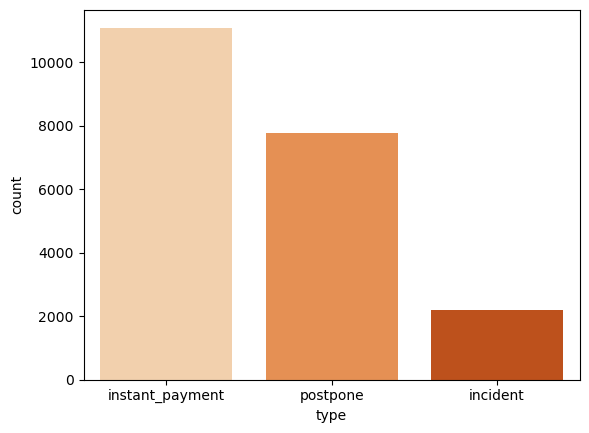

In [15]:
type_counts = fees_filter["type"].value_counts().reset_index()

display(type_counts)

sns.barplot(
    x="type",
    y='count',
    data=type_counts,
    palette='Oranges',
    legend=True,
)

plt.show()

,category,count
0,rejected_direct_debit,1599
1,month_delay_on_payment,597


/var/folders/24/ngr8p82d5634jzq4nx8yv96c0000gn/T/ipykernel_71230/485529517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


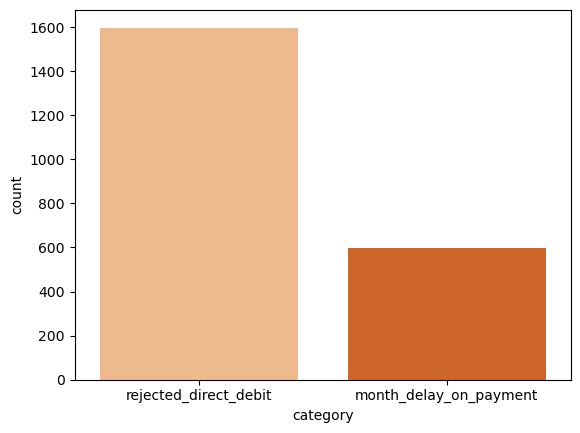

In [16]:
type_counts = fees_filter["category"].value_counts().reset_index()

display(type_counts)

sns.barplot(
    x="category",
    y='count',
    data=type_counts,
    palette='Oranges',
    legend=True,
)

plt.show()

,status,count
0,accepted,14841
1,cancelled,4938
2,rejected,1194
3,confirmed,88


/var/folders/24/ngr8p82d5634jzq4nx8yv96c0000gn/T/ipykernel_71230/1518260271.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


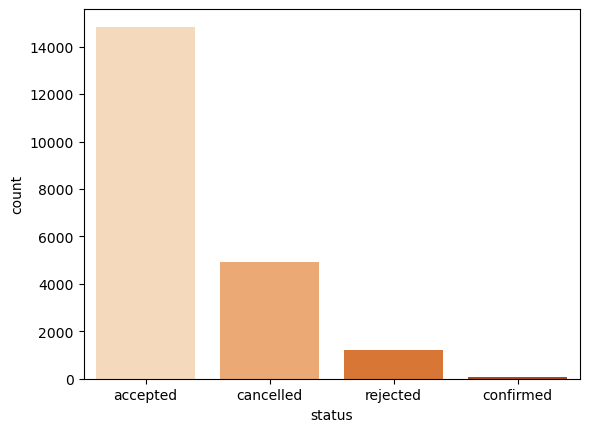

In [17]:
type_counts = fees_filter["status"].value_counts().reset_index()

display(type_counts)

sns.barplot(
    x="status",
    y='count',
    data=type_counts,
    palette='Oranges',
    legend=True,
)

plt.show()

b. Assess the quality of your dataset by checking for missing values, inconsistencies, and potential errors. Clean and preprocess the data as needed to ensure reliable analysis. You can also decide which columns to keep or drop to move forward with your analysis.

c. Be sure to document any data issues you find and explain the steps you took to fix them.

## 3. Work with dates

Convert date columns (the ones you'll need) to datetime format. Extract year/month if needed.
- Follow the self-guided lesson for this

## 4. Create your cohorts

Define cohorts using the month of each user's first send_at.
- You can do this before merging with fees, so that the cohort info is already clean and ready to join. This helps you avoid mistakes and keeps your logic easier to follow.

In [18]:
# Group the cash requests by 'id' and find the earliest 'send_at' date for each id
user_first_send = cash_request_clean.groupby('id')['send_at'].min().reset_index()

# Rename columns
user_first_send.columns = ['user_id', 'first_send_date']

# Format 'first_send_date' as "Month Year" and store as a cohort
user_first_send['cohort'] = user_first_send['first_send_date'].dt.strftime('%B %Y')

# Count how many users fall into each cohort
cohort_distribution = user_first_send['cohort'].value_counts().sort_index()

# Print the results
print(cohort_distribution)

# Save to CSV
user_first_send.to_csv('cohort.csv', index=False)

cohort
August 2020       3671
July 2020          469
November 2020      290
October 2020      8974
September 2020    3062
Name: count, dtype: int64


In [19]:
cohort_distribution

cohort
August 2020       3671
July 2020          469
November 2020      290
October 2020      8974
September 2020    3062
Name: count, dtype: int64

## 5. Merge with fees

- After assigning cohorts, merge cash request with fees to prepare for metric calculations like usage frequency, incident rate, and revenue.

In [21]:
fees_with_users = fees_filter.merge(cash_request_clean, on='id', how='left')

In [22]:
fees_with_users = fees_with_users.merge(
    user_first_send[['user_id', 'cohort']],
    left_on='id',
    right_on='user_id',
    how='left'
)
fees_with_users

,id,type,category,status_x,total_amount,created_at,updated_at,send_at,status_y,user_id,cohort
0,6537,instant_payment,NaN,rejected,5.0,2020-07-04 05:59:49.246265+00:00,2020-12-18 13:09:59.300546+00:00,NaT,money_back,6537.0,NaN
1,6961,incident,rejected_direct_debit,accepted,5.0,2020-07-07 17:45:03.352406+00:00,2020-12-18 13:10:14.466442+00:00,NaT,money_back,6961.0,NaN
2,16296,instant_payment,NaN,accepted,5.0,2020-09-15 19:05:39.267562+00:00,2020-12-18 13:09:14.593043+00:00,2020-09-22 19:05:39.221698+00:00,money_back,16296.0,September 2020
3,20775,instant_payment,NaN,accepted,5.0,2020-10-13 08:15:07.746660+00:00,2020-12-18 13:11:57.614945+00:00,2020-10-13 08:16:15.684807+00:00,money_back,20775.0,October 2020
4,11242,instant_payment,NaN,accepted,5.0,2020-08-06 22:46:50.681779+00:00,2020-12-18 13:10:59.725981+00:00,2020-08-13 22:46:50.681310+00:00,money_back,11242.0,August 2020
...,...,...,...,...,...,...,...,...,...,...,...
21056,12372,instant_payment,NaN,rejected,5.0,2020-08-13 15:21:44.956497+00:00,2020-08-14 07:08:21.821427+00:00,2020-08-20 15:21:44.920490+00:00,rejected,12372.0,August 2020
21057,20768,instant_payment,NaN,rejected,5.0,2020-10-13 07:46:38.698727+00:00,2020-12-18 13:08:54.925808+00:00,2020-10-13 07:46:50.172820+00:00,money_back,20768.0,October 2020
21058,18779,instant_payment,NaN,rejected,5.0,2020-10-01 18:51:01.003129+00:00,2020-10-02 07:41:55.392915+00:00,2020-10-08 18:51:00.974920+00:00,rejected,18779.0,October 2020
21059,16542,instant_payment,NaN,rejected,5.0,2020-09-17 07:33:06.068449+00:00,2020-12-18 13:10:48.112461+00:00,2020-09-24 07:33:06.014806+00:00,money_back,16542.0,September 2020


In [23]:
fees_with_users.head()

,id,type,category,status_x,total_amount,created_at,updated_at,send_at,status_y,user_id,cohort
0,6537,instant_payment,NaN,rejected,5.0,2020-07-04 05:59:49.246265+00:00,2020-12-18 13:09:59.300546+00:00,NaT,money_back,6537.0,NaN
1,6961,incident,rejected_direct_debit,accepted,5.0,2020-07-07 17:45:03.352406+00:00,2020-12-18 13:10:14.466442+00:00,NaT,money_back,6961.0,NaN
2,16296,instant_payment,NaN,accepted,5.0,2020-09-15 19:05:39.267562+00:00,2020-12-18 13:09:14.593043+00:00,2020-09-22 19:05:39.221698+00:00,money_back,16296.0,September 2020
3,20775,instant_payment,NaN,accepted,5.0,2020-10-13 08:15:07.746660+00:00,2020-12-18 13:11:57.614945+00:00,2020-10-13 08:16:15.684807+00:00,money_back,20775.0,October 2020
4,11242,instant_payment,NaN,accepted,5.0,2020-08-06 22:46:50.681779+00:00,2020-12-18 13:10:59.725981+00:00,2020-08-13 22:46:50.681310+00:00,money_back,11242.0,August 2020


In [24]:
fees_with_users.columns

Index(['id', 'type', 'category', 'status_x', 'total_amount', 'created_at',
       'updated_at', 'send_at', 'status_y', 'user_id', 'cohort'],
      dtype='object')

In [25]:
incident_count=fees_with_users.groupby(['cohort', 'type']).size().unstack(fill_value=0)

In [26]:
cohort_total= incident_count.sum(axis=1)

In [27]:
incident_rate=incident_count.divide(cohort_total , axis=0)

In [28]:
incident_rate.head()

type,incident,instant_payment,postpone
cohort,,,
August 2020,0.106685,0.566712,0.326603
July 2020,0.076759,0.616205,0.307036
October 2020,0.037056,0.607411,0.355533
September 2020,0.108859,0.722785,0.168356


<Axes: xlabel='type'>

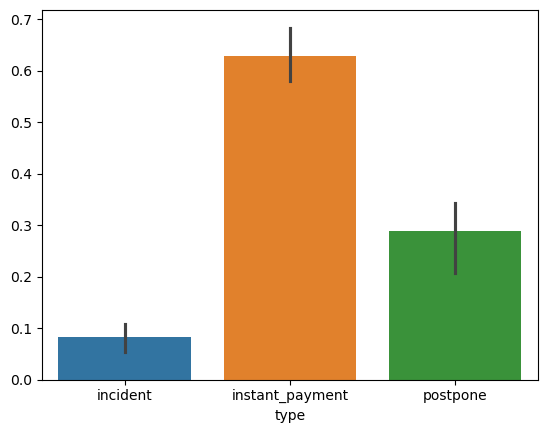

In [29]:
sns.barplot ( incident_rate)

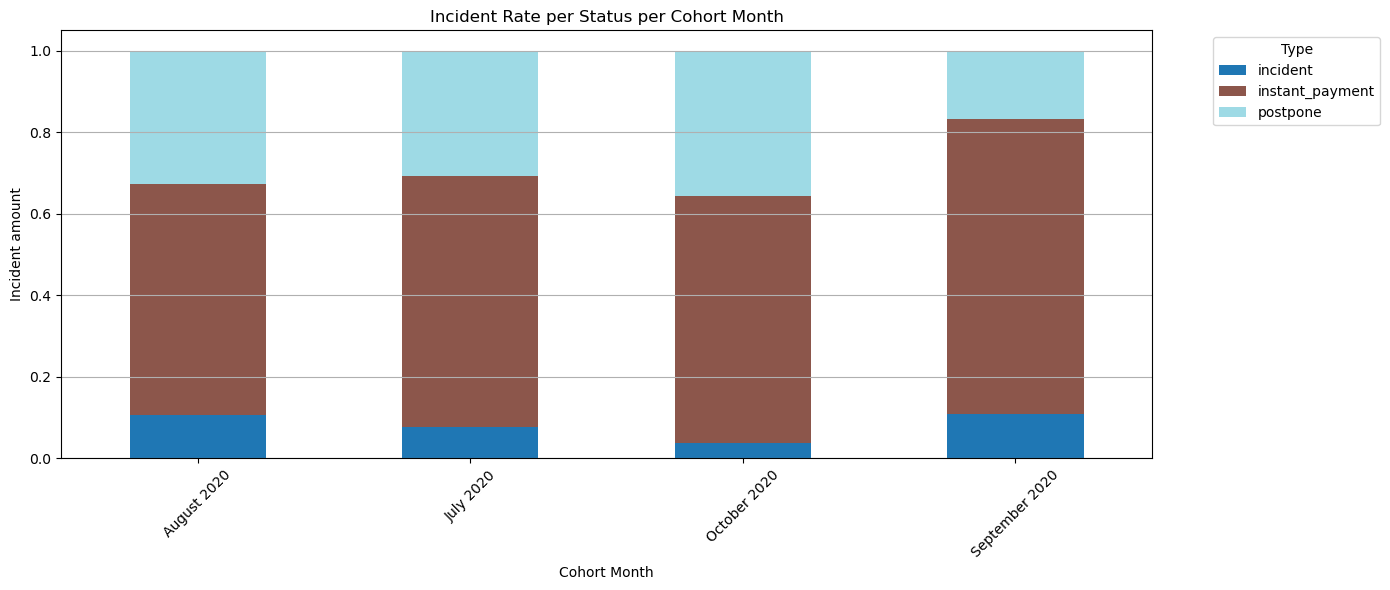

In [30]:
incident_rate.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 6),
    colormap='tab20',
    title='Incident Rate per Status per Cohort Month'
)

plt.xlabel('Cohort Month')
plt.ylabel('Incident amount')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [31]:
fees_with_users.groupby("send_at").agg("count")

,id,type,category,status_x,total_amount,created_at,updated_at,status_y,user_id,cohort
send_at,,,,,,,,,,
2020-07-27 13:02:24.293568+00:00,1,1,0,1,1,1,1,1,1,1
2020-07-27 13:06:49.529731+00:00,1,1,0,1,1,1,1,1,1,1
2020-07-27 13:22:16.338042+00:00,1,1,0,1,1,1,1,1,1,1
2020-07-27 13:25:54.391448+00:00,1,1,0,1,1,1,1,1,1,1
2020-07-27 13:26:07.623454+00:00,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
2020-10-21 16:39:37.410688+00:00,1,1,0,1,1,1,1,1,1,1
2020-10-21 21:33:00.484995+00:00,1,1,0,1,1,1,1,1,1,1
2020-10-21 22:13:38.328337+00:00,1,1,0,1,1,1,1,1,1,1


In [32]:
# Convert created_at to datetime if not already
fees_with_users['created_at'] = pd.to_datetime(fees_with_users['created_at'], errors='coerce')

# Create usage_month
fees_with_users['usage_month'] = fees_with_users['created_at'].dt.to_period('M')

# Group by cohort and usage month
usage_counts = fees_with_users.groupby(['cohort', 'usage_month']).size().reset_index(name='usage_count')

/var/folders/24/ngr8p82d5634jzq4nx8yv96c0000gn/T/ipykernel_71230/1012308251.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  fees_with_users['usage_month'] = fees_with_users['created_at'].dt.to_period('M')


/var/folders/24/ngr8p82d5634jzq4nx8yv96c0000gn/T/ipykernel_71230/2709391828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_request_clean['send_at'] = pd.to_datetime(cash_request_clean['send_at'], errors='coerce')
/var/folders/24/ngr8p82d5634jzq4nx8yv96c0000gn/T/ipykernel_71230/2709391828.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_request_clean['usage_month'] = cash_request_clean['send_at'].dt.strftime('%B')
/var/folders/24/ngr8p82d5634jzq4nx8yv96c0000gn/T/ipykernel_71230/2709391828.p

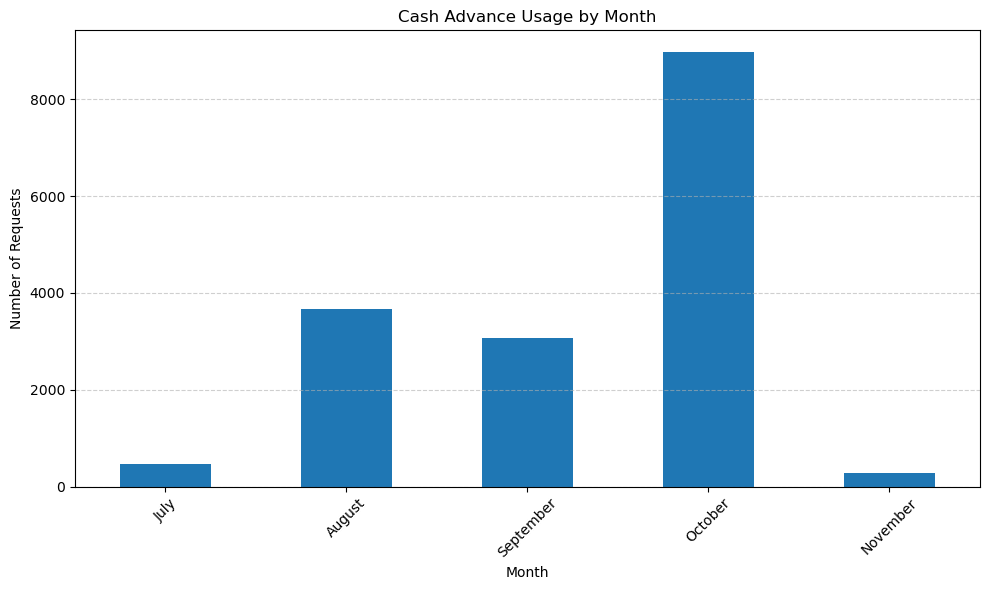

In [33]:
# Ensure 'send_at' is in datetime format
cash_request_clean['send_at'] = pd.to_datetime(cash_request_clean['send_at'], errors='coerce')

# Drop missing 'send_at'
cash_request_clean = cash_request_clean.dropna(subset=['send_at'])

# Extract full month name (e.g., 'July', 'August')
cash_request_clean['usage_month'] = cash_request_clean['send_at'].dt.strftime('%B')

# Define a categorical month order (optional: for correct sorting)
month_order = ['July', 'August', 'September', 'October', 'November',]
cash_request_clean['usage_month'] = pd.Categorical(cash_request_clean['usage_month'], categories=month_order, ordered=True)

# Count occurrences
monthly_usage = cash_request_clean['usage_month'].value_counts().sort_index()

# Plot histogram
plt.figure(figsize=(10, 6))
monthly_usage.plot(kind='bar')
plt.title('Cash Advance Usage by Month')
plt.xlabel('Month')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [34]:
fees_filter

,id,type,category,status,total_amount
0,6537,instant_payment,NaN,rejected,5.0
1,6961,incident,rejected_direct_debit,accepted,5.0
2,16296,instant_payment,NaN,accepted,5.0
3,20775,instant_payment,NaN,accepted,5.0
4,11242,instant_payment,NaN,accepted,5.0
...,...,...,...,...,...
21056,12372,instant_payment,NaN,rejected,5.0
21057,20768,instant_payment,NaN,rejected,5.0
21058,18779,instant_payment,NaN,rejected,5.0
21059,16542,instant_payment,NaN,rejected,5.0


In [35]:
user_first_send

,user_id,first_send_date,cohort
0,3,NaT,NaN
1,4,NaT,NaN
2,5,NaT,NaN
3,6,NaT,NaN
4,7,NaT,NaN
...,...,...,...
23965,27006,2020-11-01 23:08:07.414160+00:00,November 2020
23966,27007,2020-11-01 23:12:16.335916+00:00,November 2020
23967,27008,2020-11-01 23:13:28.791529+00:00,November 2020
23968,27009,2020-11-01 23:16:12.720278+00:00,November 2020


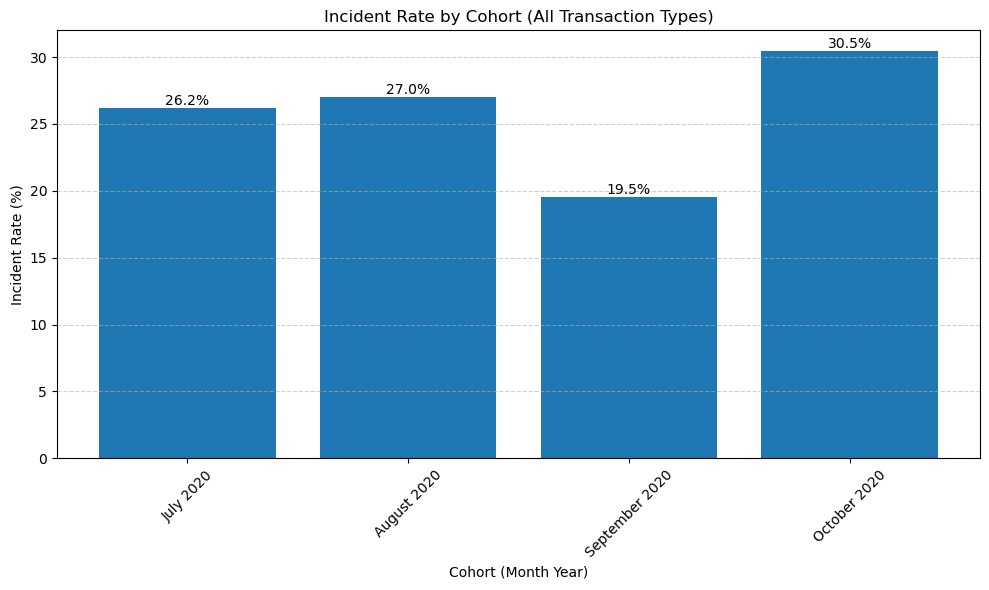

In [36]:
user_first_send['cohort'] = user_first_send['first_send_date'].dt.to_period('M').dt.strftime('%B %Y')

/var/folders/24/ngr8p82d5634jzq4nx8yv96c0000gn/T/ipykernel_71230/1056808184.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  user_first_send['cohort'] = user_first_send['first_send_date'].dt.to_period('M').dt.strftime('%B %Y')


In [37]:
fees_with_users['cohort'].value_counts().sort_index()

cohort
August 2020       3665
July 2020          469
October 2020      3859
September 2020    3059
Name: count, dtype: int64

In [38]:
fees_with_users['cohort'].unique()

array([nan, 'September 2020', 'October 2020', 'August 2020', 'July 2020'],
      dtype=object)

In [39]:
cohort_distribution

cohort
August 2020       3671
July 2020          469
November 2020      290
October 2020      8974
September 2020    3062
Name: count, dtype: int64

In [40]:
fees_with_users.head()

,id,type,category,status_x,total_amount,created_at,updated_at,send_at,status_y,user_id,cohort,usage_month
0,6537,instant_payment,NaN,rejected,5.0,2020-07-04 05:59:49.246265+00:00,2020-12-18 13:09:59.300546+00:00,NaT,money_back,6537.0,NaN,2020-07
1,6961,incident,rejected_direct_debit,accepted,5.0,2020-07-07 17:45:03.352406+00:00,2020-12-18 13:10:14.466442+00:00,NaT,money_back,6961.0,NaN,2020-07
2,16296,instant_payment,NaN,accepted,5.0,2020-09-15 19:05:39.267562+00:00,2020-12-18 13:09:14.593043+00:00,2020-09-22 19:05:39.221698+00:00,money_back,16296.0,September 2020,2020-09
3,20775,instant_payment,NaN,accepted,5.0,2020-10-13 08:15:07.746660+00:00,2020-12-18 13:11:57.614945+00:00,2020-10-13 08:16:15.684807+00:00,money_back,20775.0,October 2020,2020-10
4,11242,instant_payment,NaN,accepted,5.0,2020-08-06 22:46:50.681779+00:00,2020-12-18 13:10:59.725981+00:00,2020-08-13 22:46:50.681310+00:00,money_back,11242.0,August 2020,2020-08


In [ ]:
#subet with cohort ,total amout, status 
#groupby. ussing total amt and [total amount] and (cohort) function sum is going to be 
# subset =  

In [42]:
fees_with_users

,id,type,category,status_x,total_amount,created_at,updated_at,send_at,status_y,user_id,cohort,usage_month
0,6537,instant_payment,NaN,rejected,5.0,2020-07-04 05:59:49.246265+00:00,2020-12-18 13:09:59.300546+00:00,NaT,money_back,6537.0,NaN,2020-07
1,6961,incident,rejected_direct_debit,accepted,5.0,2020-07-07 17:45:03.352406+00:00,2020-12-18 13:10:14.466442+00:00,NaT,money_back,6961.0,NaN,2020-07
2,16296,instant_payment,NaN,accepted,5.0,2020-09-15 19:05:39.267562+00:00,2020-12-18 13:09:14.593043+00:00,2020-09-22 19:05:39.221698+00:00,money_back,16296.0,September 2020,2020-09
3,20775,instant_payment,NaN,accepted,5.0,2020-10-13 08:15:07.746660+00:00,2020-12-18 13:11:57.614945+00:00,2020-10-13 08:16:15.684807+00:00,money_back,20775.0,October 2020,2020-10
4,11242,instant_payment,NaN,accepted,5.0,2020-08-06 22:46:50.681779+00:00,2020-12-18 13:10:59.725981+00:00,2020-08-13 22:46:50.681310+00:00,money_back,11242.0,August 2020,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...
21056,12372,instant_payment,NaN,rejected,5.0,2020-08-13 15:21:44.956497+00:00,2020-08-14 07:08:21.821427+00:00,2020-08-20 15:21:44.920490+00:00,rejected,12372.0,August 2020,2020-08
21057,20768,instant_payment,NaN,rejected,5.0,2020-10-13 07:46:38.698727+00:00,2020-12-18 13:08:54.925808+00:00,2020-10-13 07:46:50.172820+00:00,money_back,20768.0,October 2020,2020-10
21058,18779,instant_payment,NaN,rejected,5.0,2020-10-01 18:51:01.003129+00:00,2020-10-02 07:41:55.392915+00:00,2020-10-08 18:51:00.974920+00:00,rejected,18779.0,October 2020,2020-10
21059,16542,instant_payment,NaN,rejected,5.0,2020-09-17 07:33:06.068449+00:00,2020-12-18 13:10:48.112461+00:00,2020-09-24 07:33:06.014806+00:00,money_back,16542.0,September 2020,2020-09


In [48]:
subset_merged_df = fees_with_users[fees_with_users['status_x'] == 'accepted']

In [50]:
subset_merged_df

,id,type,category,status_x,total_amount,created_at,updated_at,send_at,status_y,user_id,cohort,usage_month
1,6961,incident,rejected_direct_debit,accepted,5.0,2020-07-07 17:45:03.352406+00:00,2020-12-18 13:10:14.466442+00:00,NaT,money_back,6961.0,NaN,2020-07
2,16296,instant_payment,NaN,accepted,5.0,2020-09-15 19:05:39.267562+00:00,2020-12-18 13:09:14.593043+00:00,2020-09-22 19:05:39.221698+00:00,money_back,16296.0,September 2020,2020-09
3,20775,instant_payment,NaN,accepted,5.0,2020-10-13 08:15:07.746660+00:00,2020-12-18 13:11:57.614945+00:00,2020-10-13 08:16:15.684807+00:00,money_back,20775.0,October 2020,2020-10
4,11242,instant_payment,NaN,accepted,5.0,2020-08-06 22:46:50.681779+00:00,2020-12-18 13:10:59.725981+00:00,2020-08-13 22:46:50.681310+00:00,money_back,11242.0,August 2020,2020-08
5,17029,instant_payment,NaN,accepted,5.0,2020-09-21 06:17:14.044173+00:00,2020-12-18 13:11:03.097376+00:00,2020-09-28 06:17:13.995704+00:00,money_back,17029.0,September 2020,2020-09
...,...,...,...,...,...,...,...,...,...,...,...,...
20997,12867,instant_payment,NaN,accepted,5.0,2020-08-18 05:07:56.130552+00:00,2020-08-18 09:21:01.619758+00:00,2020-08-25 05:07:56.082082+00:00,rejected,12867.0,August 2020,2020-08
21002,15712,incident,rejected_direct_debit,accepted,5.0,2020-09-11 13:23:48.422634+00:00,2020-12-18 13:10:49.840215+00:00,2020-09-18 13:23:48.380809+00:00,money_back,15712.0,September 2020,2020-09
21009,14209,incident,rejected_direct_debit,accepted,5.0,NaT,NaT,NaT,NaN,NaN,NaN,NaT
21039,18244,incident,month_delay_on_payment,accepted,5.0,2020-09-28 19:10:16.657783+00:00,2020-12-18 13:11:23.507206+00:00,2020-10-05 19:10:16.636122+00:00,money_back,18244.0,October 2020,2020-09


In [49]:
total_revenue=subset_merged_df.groupby("cohort")["total_amount"].sum().reset_index()

In [51]:
total_revenue

,cohort,total_amount
0,August 2020,13375.0
1,July 2020,1730.0
2,October 2020,13415.0
3,September 2020,12315.0


/var/folders/24/ngr8p82d5634jzq4nx8yv96c0000gn/T/ipykernel_71230/2744023917.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


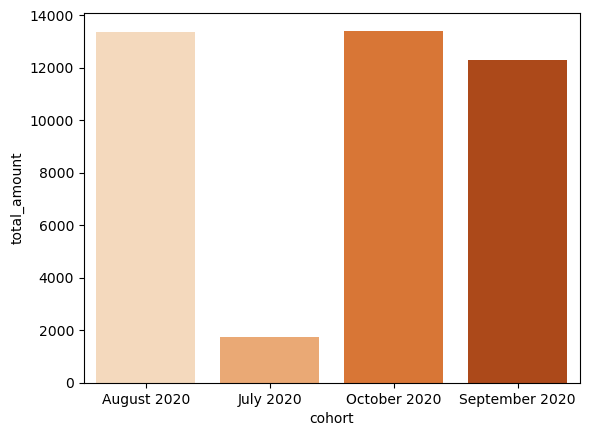

In [46]:
sns.barplot(
    x="cohort",
    y="total_amount",
    data=total_revenue,
    palette='Oranges',
    legend=True,
)

plt.show()

In [47]:
display(subset_merged_df)

,id,type,category,status_x,total_amount,created_at,updated_at,send_at,status_y,user_id,cohort,usage_month
1,6961,incident,rejected_direct_debit,accepted,5.0,2020-07-07 17:45:03.352406+00:00,2020-12-18 13:10:14.466442+00:00,NaT,money_back,6961.0,NaN,2020-07
2,16296,instant_payment,NaN,accepted,5.0,2020-09-15 19:05:39.267562+00:00,2020-12-18 13:09:14.593043+00:00,2020-09-22 19:05:39.221698+00:00,money_back,16296.0,September 2020,2020-09
3,20775,instant_payment,NaN,accepted,5.0,2020-10-13 08:15:07.746660+00:00,2020-12-18 13:11:57.614945+00:00,2020-10-13 08:16:15.684807+00:00,money_back,20775.0,October 2020,2020-10
4,11242,instant_payment,NaN,accepted,5.0,2020-08-06 22:46:50.681779+00:00,2020-12-18 13:10:59.725981+00:00,2020-08-13 22:46:50.681310+00:00,money_back,11242.0,August 2020,2020-08
5,17029,instant_payment,NaN,accepted,5.0,2020-09-21 06:17:14.044173+00:00,2020-12-18 13:11:03.097376+00:00,2020-09-28 06:17:13.995704+00:00,money_back,17029.0,September 2020,2020-09
...,...,...,...,...,...,...,...,...,...,...,...,...
20997,12867,instant_payment,NaN,accepted,5.0,2020-08-18 05:07:56.130552+00:00,2020-08-18 09:21:01.619758+00:00,2020-08-25 05:07:56.082082+00:00,rejected,12867.0,August 2020,2020-08
21002,15712,incident,rejected_direct_debit,accepted,5.0,2020-09-11 13:23:48.422634+00:00,2020-12-18 13:10:49.840215+00:00,2020-09-18 13:23:48.380809+00:00,money_back,15712.0,September 2020,2020-09
21009,14209,incident,rejected_direct_debit,accepted,5.0,NaT,NaT,NaT,NaN,NaN,NaN,NaT
21039,18244,incident,month_delay_on_payment,accepted,5.0,2020-09-28 19:10:16.657783+00:00,2020-12-18 13:11:23.507206+00:00,2020-10-05 19:10:16.636122+00:00,money_back,18244.0,October 2020,2020-09
